# Historical weather data - Zagreb, Croatia

### Import required packages

In [1514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

### Read CSV data into Pandas dataframe

In [1515]:
# Read CSV data into dataframe
data = pd.read_csv("weather_data_zagreb.csv")

# Convert string time to datetime object
data['time'] = pd.to_datetime(data['time'])

# Drop all NaN values
data = data.dropna()

# Print dataframe
data

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
1,1940-01-02,3.0,-5.2,-11.8,-8.4,-9.6,-16.3,-12.9,1940-01-02T08:37,1940-01-02T17:22,0.0,0.0,0.00,0.0,8.4,20.5,51.0,6.56,0.53
2,1940-01-03,2.0,-4.7,-17.2,-11.5,-9.5,-22.0,-16.2,1940-01-03T08:37,1940-01-03T17:23,0.0,0.0,0.00,0.0,9.7,25.2,225.0,6.15,0.46
3,1940-01-04,71.0,-2.9,-10.7,-6.8,-6.5,-14.9,-10.8,1940-01-04T08:37,1940-01-04T17:24,0.6,0.0,0.42,6.0,7.3,16.6,347.0,2.92,0.28
4,1940-01-05,3.0,-0.0,-3.7,-2.0,-4.5,-7.3,-6.0,1940-01-05T08:37,1940-01-05T17:25,0.0,0.0,0.00,0.0,8.7,21.2,14.0,4.92,0.63
5,1940-01-06,1.0,0.5,-2.6,-1.1,-3.3,-6.4,-5.0,1940-01-06T08:36,1940-01-06T17:26,0.0,0.0,0.00,0.0,8.2,15.1,15.0,5.61,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30507,2023-07-11,51.0,33.0,19.9,27.6,37.6,22.6,31.2,2023-07-11T05:17,2023-07-11T20:46,0.1,0.1,0.00,1.0,6.7,17.3,248.0,25.22,5.36
30508,2023-07-12,51.0,34.3,21.0,27.7,36.0,22.6,29.6,2023-07-12T05:18,2023-07-12T20:45,0.1,0.1,0.00,1.0,17.5,41.4,249.0,24.26,6.15
30509,2023-07-13,63.0,29.1,19.7,23.6,34.1,20.6,26.2,2023-07-13T05:18,2023-07-13T20:44,26.3,26.3,0.00,9.0,15.5,34.9,8.0,18.45,3.73
30510,2023-07-14,2.0,27.9,16.4,22.4,29.8,18.1,24.7,2023-07-14T05:19,2023-07-14T20:44,0.0,0.0,0.00,0.0,8.3,20.5,77.0,26.88,5.19


### White Christmas years

#### Years in which there was a snowfall on a Christmas day

In [1516]:
# Filter only Christmas dates which include snowfall values larger than zero
white_christmas_years = data[(data["time"].dt.day == 25) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create dataframe copy which contains only two columns
white_christmas_years = white_christmas_years[["time", "snowfall_sum (cm)"]].copy()
# Print dataframe
white_christmas_years

,time,snowfall_sum (cm)
0,1940-12-25,7.56
1,1943-12-25,1.96
2,1959-12-25,0.28
3,1961-12-25,0.35
4,1965-12-25,3.57
5,1969-12-25,0.07
6,1970-12-25,7.14
7,1981-12-25,0.56
8,1982-12-25,3.85
9,1984-12-25,4.48


#### Minimum, maximum and average temperatures on a Christmas day for a period from 1940 to 2022

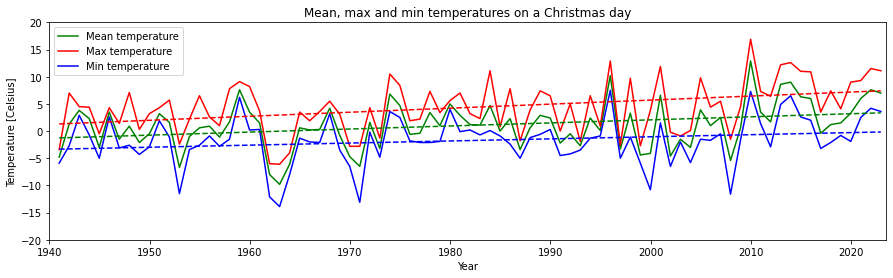

In [1517]:
# Filter out Christmas data
christmas_data = data[(data["time"].dt.day == 25) & (data["time"].dt.month == 12)].reset_index(drop=True)

plt.figure().set_figwidth(15)

# Plot minimum, maximum and average temperatures on a Christmas day
plt.plot(christmas_data["time"], christmas_data["temperature_2m_mean (°C)"], label="Mean temperature", color="green", linestyle="-")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_max (°C)"], label="Max temperature", color="red", linestyle="-")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_min (°C)"], label="Min temperature", color="blue", linestyle="-")

# Set xlabel and ylabel names
plt.xlabel("Year")
plt.ylabel("Temperature [Celsius]")

# Set limits of x and y labels
plt.xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 13)])
plt.ylim(-20, 20)

# Plot legends
plt.legend()

# Calculate linear trendlines
z_mean = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_mean (°C)"], 1)
p_mean = np.poly1d(z_mean)
z_max = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_max (°C)"], 1)
p_max = np.poly1d(z_max)
z_min = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_min (°C)"], 1)
p_min = np.poly1d(z_min)

# Plot trendlines
plt.plot(christmas_data["time"], p_mean(christmas_data["time"].dt.year), color="green", linestyle="--")
plt.plot(christmas_data["time"], p_max(christmas_data["time"].dt.year), color="red", linestyle="--")
plt.plot(christmas_data["time"], p_min(christmas_data["time"].dt.year), color="blue", linestyle="--")

plt.title("Mean, max and min temperatures on a Christmas day")

# Save figure to pdf file
plt.savefig('christmas_temperatures.pdf', bbox_inches='tight')

#### Years with snowfall during the period of 10 days before Christmas

In [1518]:
# Filter out all the years with the snowfall in the period from December 15th to December 25th
snowfall_before_christmas_years = data[(data["time"].dt.day >= 15) & (data["time"].dt.day <= 25) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create three-column dataframe
snowfall_before_christmas_years = snowfall_before_christmas_years[["time", "temperature_2m_mean (°C)", "snowfall_sum (cm)"]].copy()
# Print dataframe
snowfall_before_christmas_years

,time,temperature_2m_mean (°C),snowfall_sum (cm)
0,1940-12-22,-13.4,0.98
1,1940-12-23,-8.2,2.87
2,1940-12-24,-7.5,7.49
3,1940-12-25,-4.8,7.56
4,1941-12-18,2.4,7.84
...,...,...,...
178,2017-12-18,-0.4,0.07
179,2017-12-21,1.1,0.07
180,2018-12-15,-0.1,1.40
181,2020-12-25,6.0,0.28


## Hot days in Zagreb

#### Get all days with max temperature larger than given threshold value

In [1519]:
# Define threshold temperature value
max_threshold_temp_value = 33

# Filter out days with maximum temperature values larger than threshold value
hot_days = data[data["temperature_2m_max (°C)"] >= max_threshold_temp_value].reset_index(drop=True)
# Print dataframe
hot_days

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1943-08-21,0.0,34.4,16.4,26.1,35.5,16.7,27.1,1943-08-21T06:03,1943-08-21T19:55,0.0,0.0,0.0,0.0,6.5,14.4,273.0,23.77,5.01
1,1943-08-22,0.0,34.0,15.9,25.6,34.3,16.1,26.1,1943-08-22T06:04,1943-08-22T19:53,0.0,0.0,0.0,0.0,8.6,23.0,235.0,23.71,5.35
2,1945-07-26,1.0,33.0,19.7,26.8,34.8,20.7,28.2,1945-07-26T05:32,1945-07-26T20:32,0.0,0.0,0.0,0.0,7.0,19.8,120.0,26.09,5.63
3,1945-07-27,1.0,34.0,19.0,26.5,35.4,20.7,27.8,1945-07-27T05:33,1945-07-27T20:31,0.0,0.0,0.0,0.0,9.9,30.6,240.0,24.85,5.72
4,1945-07-28,0.0,35.1,19.5,27.2,36.3,20.8,28.4,1945-07-28T05:35,1945-07-28T20:30,0.0,0.0,0.0,0.0,13.6,27.4,236.0,26.11,6.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2022-08-18,51.0,36.3,20.0,28.3,37.2,21.8,29.7,2022-08-18T05:59,2022-08-18T20:00,0.1,0.1,0.0,1.0,15.8,29.2,209.0,20.89,5.08
337,2023-06-22,1.0,33.3,21.2,27.4,38.2,24.3,31.7,2023-06-22T05:06,2023-06-22T20:49,0.0,0.0,0.0,0.0,8.2,17.3,197.0,27.88,5.83
338,2023-07-10,1.0,33.8,20.4,27.3,36.6,22.5,30.1,2023-07-10T05:16,2023-07-10T20:46,0.0,0.0,0.0,0.0,7.9,17.3,177.0,26.39,5.81
339,2023-07-11,51.0,33.0,19.9,27.6,37.6,22.6,31.2,2023-07-11T05:17,2023-07-11T20:46,0.1,0.1,0.0,1.0,6.7,17.3,248.0,25.22,5.36


#### Get a total number of hot days per year

In [1520]:
# Get a total number of hot days per each year
total_num_of_hot_days_per_year = hot_days.groupby(hot_days["time"].dt.year)["time"].count()
# Print the total number of hot days per each year
total_num_of_hot_days_per_year

time
1943     2
1945     7
1946    14
1947     3
1949     5
1950    16
1951     1
1952    12
1956     1
1957     8
1958     6
1961     2
1963     1
1965     1
1967     1
1968     2
1970     2
1971     1
1979     1
1980     1
1981     1
1983     7
1984     2
1987     3
1988    13
1992    15
1993     8
1994     4
1997     1
1998     5
1999     2
2000    11
2001     9
2002     1
2003    13
2005     3
2006     3
2007    14
2008     2
2009     5
2010     6
2011    12
2012    25
2013    16
2015    15
2016     3
2017    18
2018     1
2019     2
2020     1
2021    16
2022    13
2023     4
Name: time, dtype: int64

#### Plot the total number of hot days for each year

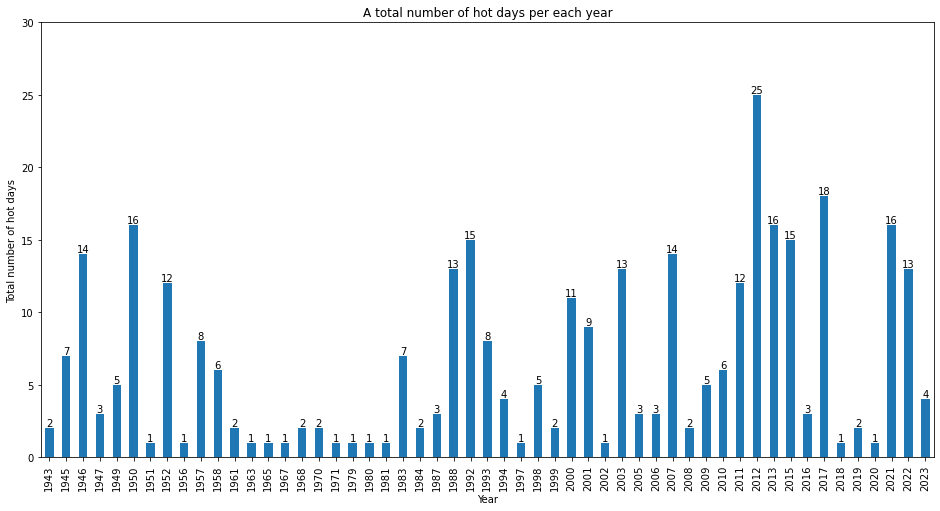

In [1521]:
# Plot a total number of hot days per each year
plot = total_num_of_hot_days_per_year.plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of hot days", legend=False, ylim=(0,30))
plt.title("A total number of hot days per each year")
plt.bar_label(container=plot.containers[0])

# Save figure to pdf file
plt.savefig('total_num_of_hot_days_per_each_year.pdf', bbox_inches='tight')

#### Get a total number of years with at least one hot day

In [1522]:
# Get a total number of years with at least one hot day
total_num_of_years_with_at_least_one_hot_day = total_num_of_hot_days_per_year.size
# Print out the value
print("A total number of years with at least one hot day:", total_num_of_years_with_at_least_one_hot_day)

A total number of years with at least one hot day: 53


#### Get a total number of years without any hot day

In [1523]:
# Get a total number of years without any hot day
total_num_of_years_without_any_hot_day = len(data["time"].dt.year.unique()) - total_num_of_years_with_at_least_one_hot_day
# Print out the value
print("A total number of years without any hot day:", total_num_of_years_without_any_hot_day)

A total number of years without any hot day: 31


#### Total number of hot days per each decade

In [1524]:
# Data by decades
_40s = data[(data["time"].dt.year >= 1940) & (data["time"].dt.year <= 1949)]
_50s = data[(data["time"].dt.year >= 1950) & (data["time"].dt.year <= 1959)]
_60s = data[(data["time"].dt.year >= 1960) & (data["time"].dt.year <= 1969)]
_70s = data[(data["time"].dt.year >= 1970) & (data["time"].dt.year <= 1979)]
_80s = data[(data["time"].dt.year >= 1980) & (data["time"].dt.year <= 1989)]
_90s = data[(data["time"].dt.year >= 1990) & (data["time"].dt.year <= 1999)]
_00s = data[(data["time"].dt.year >= 2000) & (data["time"].dt.year <= 2009)]
_10s = data[(data["time"].dt.year >= 2010) & (data["time"].dt.year <= 2019)]
_20s = data[(data["time"].dt.year >= 2020) & (data["time"].dt.year <= 2029)]

In [1525]:
# Store a total number of hot days in each decade into dictionary
total_num_of_hot_days_per_decade = {
    "1940-1949": _40s[_40s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1950-1959": _50s[_50s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1960-1969": _60s[_60s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1970-1979": _70s[_70s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1980-1989": _80s[_80s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1990-1999": _90s[_90s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2000-2009": _00s[_00s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2010-2019": _10s[_10s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2020-2029": _20s[_20s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count()
}

# Convert dictionary to dataframe
total_num_of_hot_days_per_decade = pd.DataFrame.from_dict([total_num_of_hot_days_per_decade]).transpose().rename(columns={0: "Total number of hot days"})
total_num_of_hot_days_per_decade

,Total number of hot days
1940-1949,31
1950-1959,44
1960-1969,7
1970-1979,4
1980-1989,27
1990-1999,35
2000-2009,61
2010-2019,98
2020-2029,34


#### Plot a total number of hot days per decade

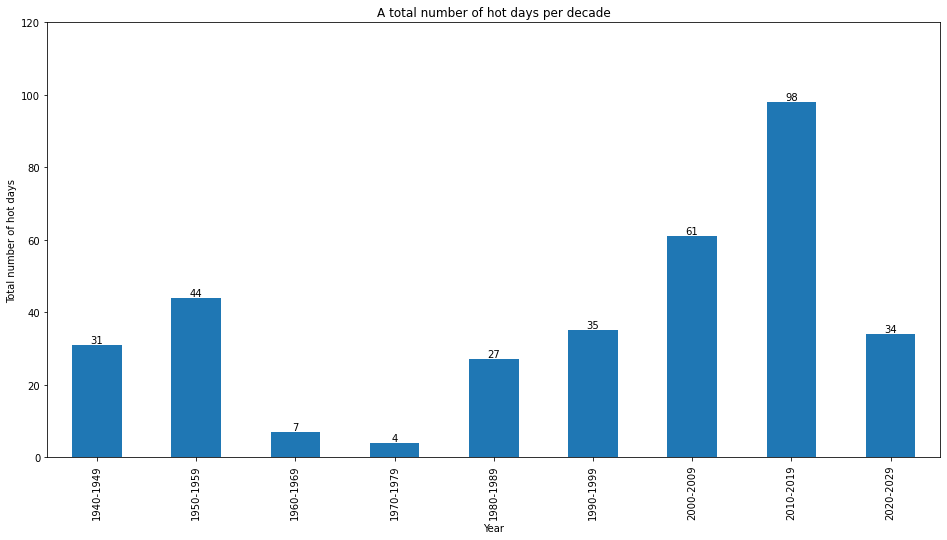

In [1526]:
# Plot a total number of hot days per decade
plot = total_num_of_hot_days_per_decade.plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of hot days", legend=False, ylim=(0,120))
plt.title("A total number of hot days per decade")
plt.bar_label(container=plot.containers[0])

# Save figure to pdf file
plt.savefig('total_num_of_hot_days_per_decades.pdf', bbox_inches='tight')

## Heatwaves in Zagreb

#### Create heatwaves dataframe that stores only heatwave data (three or more consecutive days with max temperatures larger than given threshold value)

In [1527]:
# Every time we see a date with a difference greater than a day, we add a value to that date. 
# Otherwise it remains with the previous value so that we end up with a unique identifier per group.
hot_days['grp_date'] = hot_days["time"].diff().dt.days.ne(1).cumsum()

In [1528]:
# Calculate the total number of consecutive hot days by counting the equal grp_date values
num_of_consecutive_hot_days = hot_days.groupby('grp_date')['grp_date'].count()

In [1529]:
# Join dataframes on grp_date column values
df = hot_days.join(num_of_consecutive_hot_days, on="grp_date", lsuffix="", rsuffix="_total_number")
# Consider only that days with number larger than 3, i.e. we shall assume that heatwaves occur when 3 
# or more days are hotter than given threshold value.
heat_waves = df[df["grp_date_total_number"] >= 3].reset_index(drop=True)
# Print heatwaves dataframe
heat_waves

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),grp_date,grp_date_total_number
0,1945-07-26,1.0,33.0,19.7,26.8,34.8,20.7,28.2,1945-07-26T05:32,1945-07-26T20:32,...,0.0,0.0,0.0,7.0,19.8,120.0,26.09,5.63,2,3
1,1945-07-27,1.0,34.0,19.0,26.5,35.4,20.7,27.8,1945-07-27T05:33,1945-07-27T20:31,...,0.0,0.0,0.0,9.9,30.6,240.0,24.85,5.72,2,3
2,1945-07-28,0.0,35.1,19.5,27.2,36.3,20.8,28.4,1945-07-28T05:35,1945-07-28T20:30,...,0.0,0.0,0.0,13.6,27.4,236.0,26.11,6.22,2,3
3,1946-08-09,1.0,34.0,19.7,27.4,35.0,19.4,27.9,1946-08-09T05:49,1946-08-09T20:14,...,0.0,0.0,0.0,7.5,17.6,56.0,23.81,5.34,9,5
4,1946-08-10,0.0,34.8,19.8,27.8,36.2,21.3,29.0,1946-08-10T05:50,1946-08-10T20:12,...,0.0,0.0,0.0,8.2,21.6,266.0,23.29,5.31,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2022-07-22,0.0,35.3,20.0,28.7,37.3,21.0,30.1,2022-07-22T05:27,2022-07-22T20:37,...,0.0,0.0,0.0,8.9,24.8,23.0,26.86,6.14,162,3
156,2022-07-23,51.0,37.6,25.4,31.2,39.0,26.1,32.1,2022-07-23T05:28,2022-07-23T20:36,...,0.1,0.0,1.0,10.6,28.4,175.0,24.10,6.29,162,3
157,2023-07-10,1.0,33.8,20.4,27.3,36.6,22.5,30.1,2023-07-10T05:16,2023-07-10T20:46,...,0.0,0.0,0.0,7.9,17.3,177.0,26.39,5.81,167,3
158,2023-07-11,51.0,33.0,19.9,27.6,37.6,22.6,31.2,2023-07-11T05:17,2023-07-11T20:46,...,0.1,0.0,1.0,6.7,17.3,248.0,25.22,5.36,167,3


#### Total number of heatwave days per year

In [1530]:
# Calculate total number of heatwave days per each year
num_of_heatwave_days_per_year = heat_waves.groupby(heat_waves["time"].dt.year)["grp_date"].count().to_frame(name="Num of heatwave days")
# Print dataframe
num_of_heatwave_days_per_year["Num of heatwave days"]

time
1945     3
1946     8
1950    13
1952     5
1957     8
1958     3
1983     3
1988     3
1992    12
1993     3
2000     6
2001     6
2005     3
2007    10
2010     4
2011     9
2012    15
2013    15
2015    11
2017     5
2021     9
2022     3
2023     3
Name: Num of heatwave days, dtype: int64

In [1531]:
# Total number of years with heatwaves
number_of_years_with_heatwaves, _ = num_of_heatwave_days_per_year.shape
print("Number of years with heatwaves:", number_of_years_with_heatwaves)

Number of years with heatwaves: 23


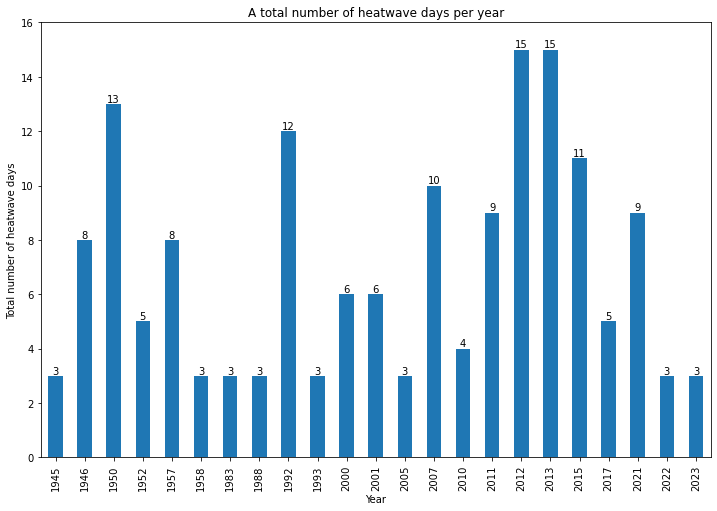

In [1532]:
# Plot a total number of heatwave days per year
plot = num_of_heatwave_days_per_year.plot(kind="bar", figsize=(12,8), xlabel="Year", ylabel="Total number of heatwave days", legend=False, ylim=(0,16))
plt.title("A total number of heatwave days per year")
plt.bar_label(container=plot.containers[0])

# Save figure to pdf file
plt.savefig('total_num_of_heatwave_days_per_year.pdf', bbox_inches='tight')

#### Total number of heatwave days per decades

In [1533]:
# Heatwave data by decades
_40s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1940) & (heat_waves["time"].dt.year <= 1949)]
_50s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1950) & (heat_waves["time"].dt.year <= 1959)]
_60s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1960) & (heat_waves["time"].dt.year <= 1969)]
_70s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1970) & (heat_waves["time"].dt.year <= 1979)]
_80s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1980) & (heat_waves["time"].dt.year <= 1989)]
_90s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1990) & (heat_waves["time"].dt.year <= 1999)]
_00s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2000) & (heat_waves["time"].dt.year <= 2009)]
_10s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2010) & (heat_waves["time"].dt.year <= 2019)]
_20s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2020) & (heat_waves["time"].dt.year <= 2029)]


In [1534]:
# Store total number of heatwave days per decades in dictionary
total_num_of_hot_days_per_decade = {
    "1940-1949": _40s_heatwave_days["time"].size,
    "1950-1959": _50s_heatwave_days["time"].size,
    "1960-1969": _60s_heatwave_days["time"].size,
    "1970-1979": _70s_heatwave_days["time"].size,
    "1980-1989": _80s_heatwave_days["time"].size,
    "1990-1999": _90s_heatwave_days["time"].size,
    "2000-2009": _00s_heatwave_days["time"].size,
    "2010-2019": _10s_heatwave_days["time"].size,
    "2020-2029": _20s_heatwave_days["time"].size
}

# Convert dictionary to dataframe
total_num_of_heatwave_days_per_decade = pd.DataFrame.from_dict([total_num_of_hot_days_per_decade]).transpose().rename(columns={0: "Total number of heatwave days"})
total_num_of_heatwave_days_per_decade

,Total number of heatwave days
1940-1949,11
1950-1959,29
1960-1969,0
1970-1979,0
1980-1989,6
1990-1999,15
2000-2009,25
2010-2019,59
2020-2029,15


#### Plot a total number of heatwave days per decade

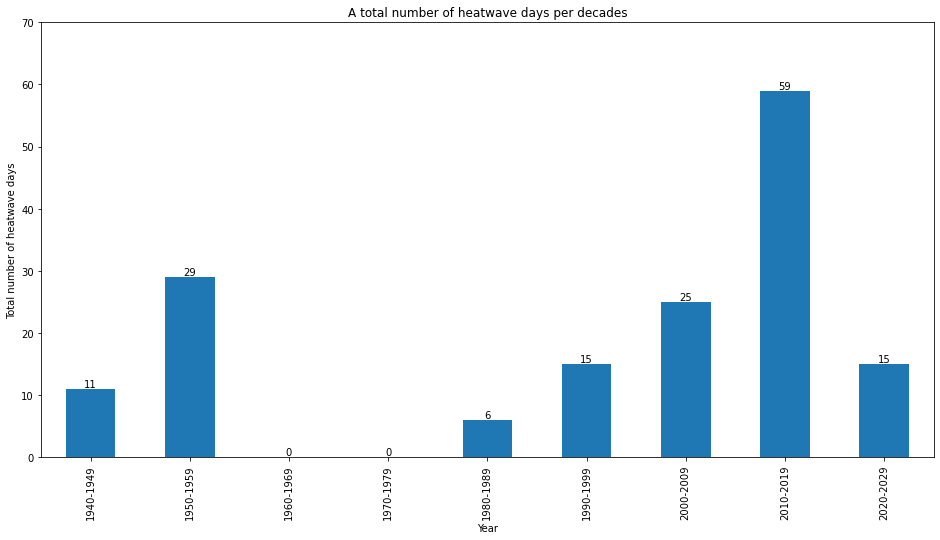

In [1535]:
# Plot a total number of heatwave days per decade
plot = total_num_of_heatwave_days_per_decade.plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of heatwave days", legend=False, ylim=(0,70))
plt.title("A total number of heatwave days per decades")
plt.bar_label(container=plot.containers[0])

# Save figure to pdf file
plt.savefig('total_num_of_heatwave_days_per_decades.pdf', bbox_inches='tight')

#### Total number of heatwaves per year

In [1536]:
# Determine total number of heatwaves per year
total_num_of_heatwaves_per_year = heat_waves.groupby(heat_waves.time.dt.year)["grp_date"].unique().apply(lambda x: len(x))
# Print series
total_num_of_heatwaves_per_year

time
1945    1
1946    2
1950    2
1952    1
1957    2
1958    1
1983    1
1988    1
1992    3
1993    1
2000    1
2001    2
2005    1
2007    1
2010    1
2011    2
2012    3
2013    3
2015    3
2017    1
2021    2
2022    1
2023    1
Name: grp_date, dtype: int64

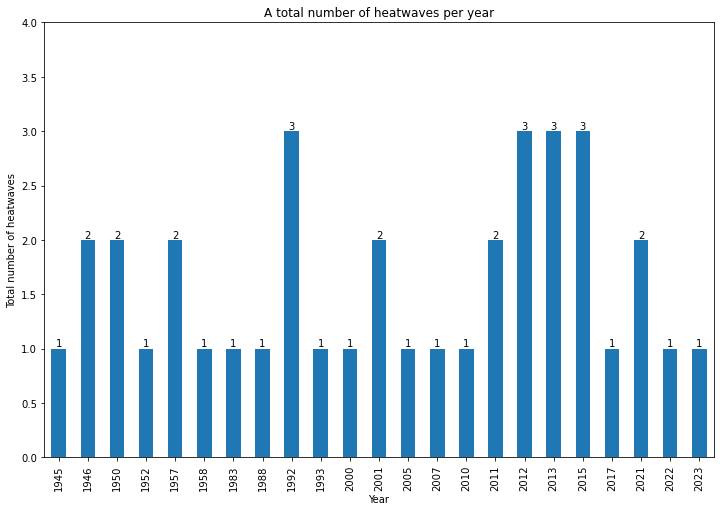

In [1537]:
# Plot a total number of heatwaves per year
plot = total_num_of_heatwaves_per_year.plot(kind="bar", figsize=(12,8), xlabel="Year", ylabel="Total number of heatwaves", legend=False, ylim=(0,4))
plt.title("A total number of heatwaves per year")
plt.bar_label(container=plot.containers[0])

# Save figure to pdf file
plt.savefig('total_num_of_heatwaves_per_year.pdf', bbox_inches='tight')

#### Total number of heatwaves per decades

In [1538]:
# Create dataframes with the total number of heatwaves per each decade
_40s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1940 and key <= 1949}
_50s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1950 and key <= 1959}
_60s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1960 and key <= 1969}
_70s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1970 and key <= 1979}
_80s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1980 and key <= 1989}
_90s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1990 and key <= 1999}
_00s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2000 and key <= 2009}
_10s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2010 and key <= 2019}
_20s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2020 and key <= 2029}

In [1539]:
# Store total number of heatwaves per decades in dictionary
total_num_of_heatwaves_per_decade = {
    "1940-1949": len(_40s_num_of_heatwaves.items()),
    "1950-1959": len(_50s_num_of_heatwaves.items()),
    "1960-1969": len(_60s_num_of_heatwaves.items()),
    "1970-1979": len(_70s_num_of_heatwaves.items()),
    "1980-1989": len(_80s_num_of_heatwaves.items()),
    "1990-1999": len(_90s_num_of_heatwaves.items()),
    "2000-2009": len(_00s_num_of_heatwaves.items()),
    "2010-2019": len(_10s_num_of_heatwaves.items()),
    "2020-2029": len(_20s_num_of_heatwaves.items())
}

# Convert dictionary to dataframe
total_num_of_heatwaves_per_decade = pd.DataFrame.from_dict([total_num_of_heatwaves_per_decade]).transpose().rename(columns={0: "Total number of heatwaves"})
total_num_of_heatwaves_per_decade

,Total number of heatwaves
1940-1949,2
1950-1959,4
1960-1969,0
1970-1979,0
1980-1989,2
1990-1999,2
2000-2009,4
2010-2019,6
2020-2029,3


#### Plot a total number of heatwaves per each decade

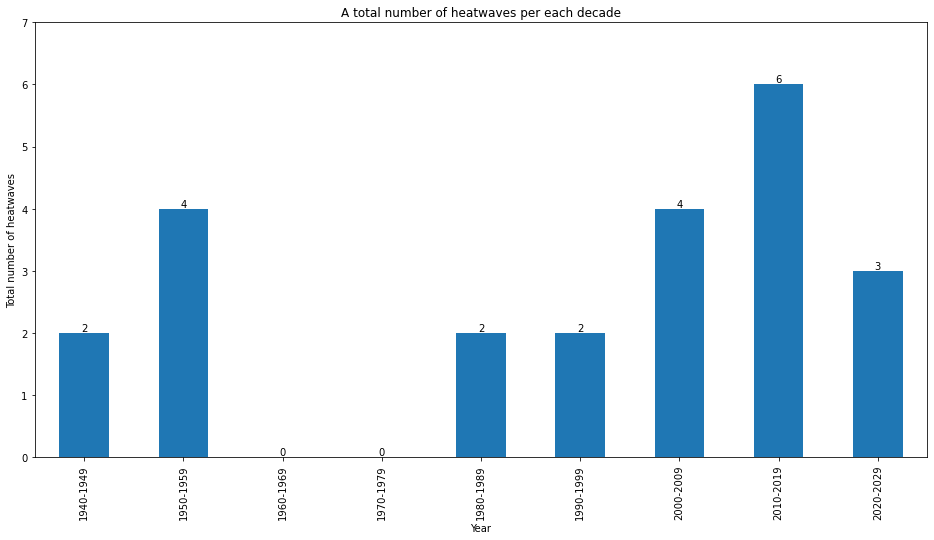

In [1540]:
# Plot a total number of heatwaves per decades
plot = total_num_of_heatwaves_per_decade.plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of heatwaves", legend=False, ylim=(0,7))
plt.title("A total number of heatwaves per each decade")
plt.bar_label(container=plot.containers[0])

# Save figure to pdf file
plt.savefig('total_num_of_heatwaves_per_decades.pdf', bbox_inches='tight')

#### Day with maximum temperature in Zagreb

In [1541]:
# Get a day with maximum temperature in Zagreb
data[data["temperature_2m_max (°C)"] == data["temperature_2m_max (°C)"].max()]

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
3838,1950-07-05,0.0,39.0,21.5,30.6,39.4,23.1,31.5,1950-07-05T05:11,1950-07-05T20:48,0.0,0.0,0.0,0.0,7.9,20.2,213.0,28.23,6.87


#### Day with minimum temperature in Zagreb

In [1542]:
# Get a day with minimum temperature in Zagreb
data[data["temperature_2m_min (°C)"] == data["temperature_2m_min (°C)"].min()]

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
45,1940-02-15,1.0,-10.1,-28.9,-18.9,-14.8,-33.7,-23.6,1940-02-15T07:58,1940-02-15T18:21,0.0,0.0,0.0,0.0,8.8,17.6,241.0,12.32,0.55


## Max, mean and min temperature distributions through years

#### Calculate average max, min and mean temperatures

In [1543]:
# Calculate average mean temperature
avg_mean_temp = data["temperature_2m_mean (°C)"].mean()
# Calculate average max temperature
avg_max_temp = data["temperature_2m_max (°C)"].mean()
# Calculate average min temperature
avg_min_temp = data["temperature_2m_min (°C)"].mean()

# Print values
print("Average mean temperature:", avg_mean_temp)
print("Average maximum temperature:", avg_max_temp)
print("Average minimum temperature:", avg_min_temp)

Average mean temperature: 11.07514666841456
Average maximum temperature: 15.60817082363736
Average minimum temperature: 6.714712726557643


#### Plot max, mean and min temperatures over the years

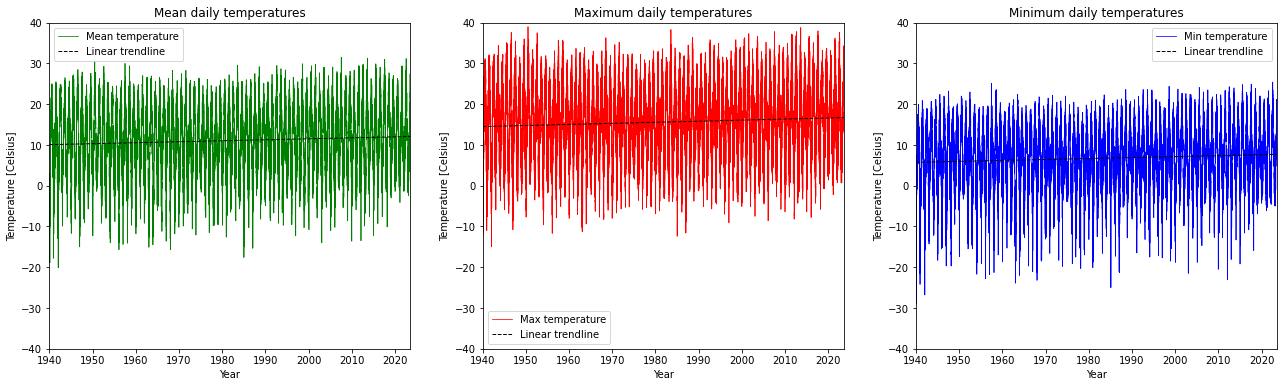

In [1544]:
# Plot minimum, maximum and average temperatures over the years
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(22)
fig.set_figheight(6)
ax1.plot(data["time"], data["temperature_2m_mean (°C)"], label="Mean temperature", color="green", linestyle="-", linewidth=0.75)
ax2.plot(data["time"], data["temperature_2m_max (°C)"], label="Max temperature", color="red", linestyle="-", linewidth=0.75)
ax3.plot(data["time"], data["temperature_2m_min (°C)"], label="Min temperature", color="blue", linestyle="-", linewidth=0.75)

# Set xlabel and ylabel names
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature [Celsius]")
ax2.set_xlabel("Year")
ax2.set_ylabel("Temperature [Celsius]")
ax3.set_xlabel("Year")
ax3.set_ylabel("Temperature [Celsius]")

# Set limits of x and y labels
ax1.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax1.set_ylim(-40, 40)
ax2.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax2.set_ylim(-40, 40)
ax3.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax3.set_ylim(-40, 40)

# Calculate linear trendlines
z_mean = np.polyfit(data["time"].dt.year, data["temperature_2m_mean (°C)"], 1)
p_mean = np.poly1d(z_mean)
z_max = np.polyfit(data["time"].dt.year, data["temperature_2m_max (°C)"], 1)
p_max = np.poly1d(z_max)
z_min = np.polyfit(data["time"].dt.year, data["temperature_2m_min (°C)"], 1)
p_min = np.poly1d(z_min)

# Plot trendlines
ax1.plot(data["time"], p_mean(data["time"].dt.year), color="black", linestyle="--", linewidth="1", label="Linear trendline")
ax2.plot(data["time"], p_max(data["time"].dt.year), color="black", linestyle="--", linewidth="1", label="Linear trendline")
ax3.plot(data["time"], p_min(data["time"].dt.year), color="black", linestyle="--", linewidth="1", label="Linear trendline")

# Plot legends
ax1.legend()
ax2.legend()
ax3.legend()

# Subplot titles
ax1.set_title("Mean daily temperatures")
ax2.set_title("Maximum daily temperatures")
ax3.set_title("Minimum daily temperatures")

# Save figure to pdf file
plt.savefig('daily_temperatures_per_year.pdf', bbox_inches='tight')

## Wind in Zagreb

#### Largest wind speeds

In [1545]:
# Get a day with maximum wind speed in Zagreb
data[data["windspeed_10m_max (km/h)"] == data["windspeed_10m_max (km/h)"].max()]

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
16111,1984-02-10,3.0,4.4,1.0,2.3,-3.8,-6.5,-5.4,1984-02-10T08:07,1984-02-10T18:13,0.0,0.0,0.0,0.0,43.9,100.1,10.0,6.66,1.9


In [1546]:
# Get a day with maximum wind gusts in Zagreb
data[data["windgusts_10m_max (km/h)"] == data["windgusts_10m_max (km/h)"].max()]

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
16111,1984-02-10,3.0,4.4,1.0,2.3,-3.8,-6.5,-5.4,1984-02-10T08:07,1984-02-10T18:13,0.0,0.0,0.0,0.0,43.9,100.1,10.0,6.66,1.9
